In [ ]:
#Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day.
#Visualize accident hotspots and contributing factors.

In [ ]:
# Downloading the Dataset

In [1]:
!git clone https://github.com/Siddhubn/Traffic-Accident-Data-Analysis.git
!ls Traffic-Accident-Data-Analysis


Cloning into 'Traffic-Accident-Data-Analysis'...
remote: Enumerating objects: 13564, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13564 (delta 5), reused 0 (delta 0), pack-reused 13553 (from 2)
Receiving objects: 100% (13564/13564), 121.87 MiB | 10.34 MiB/s, done.
Resolving deltas: 100% (1543/1543), done.
Updating files: 100% (13193/13193), done.
accident_hotspots.html
analysis.py
cleaned_synthetic_traffic_accident_data.csv
cluster_map.html
LICENSE
README.md
requirements.txt
snapshots
synthetic_traffic_accident_data.csv
venv


In [3]:
# Import Libraries & Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.cluster import KMeans

df = pd.read_csv('Traffic-Accident-Data-Analysis/cleaned_synthetic_traffic_accident_data.csv')
df.head()


,Start_Time,Start_Lat,Start_Lng,Weather_Condition,Road_Condition,Hour,Day_of_Week,Month,Cluster
0,2022-01-01 00:00:00,38.745401,-110.743354,Hail,Dry,0,Saturday,January,0
1,2022-01-01 01:00:00,44.507143,-92.904953,Clear,Muddy,1,Saturday,January,3
2,2022-01-01 02:00:00,42.319939,-76.352708,Rain,Snowy,2,Saturday,January,2
3,2022-01-01 03:00:00,40.986585,-83.388756,Rain,Construction,3,Saturday,January,1
4,2022-01-01 04:00:00,36.560186,-79.671943,Storm,Icy,4,Saturday,January,8


In [4]:
# Data Cleaning & Feature Extraction

In [5]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df = df.dropna(subset=['Weather_Condition', 'Road_Condition', 'Start_Lat', 'Start_Lng'])


In [6]:
# Exploratory Data Analysis (EDA)
# Accidents by Weather & Road Conditions



Text(0.5, 1.0, 'Accidents by Weather')

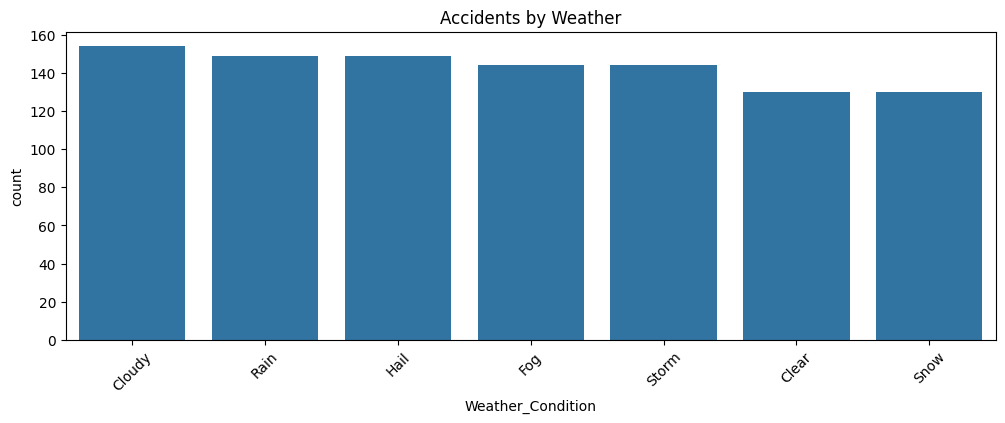

In [7]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='Weather_Condition', order=df['Weather_Condition'].value_counts().index)
plt.xticks(rotation=45); plt.title('Accidents by Weather')


Text(0.5, 1.0, 'Accidents by Road Condition')

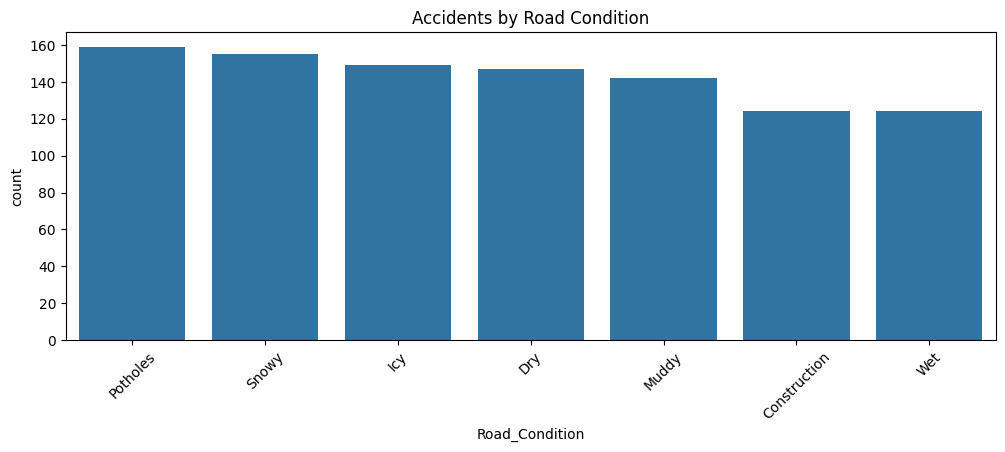

In [8]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='Road_Condition', order=df['Road_Condition'].value_counts().index)
plt.xticks(rotation=45); plt.title('Accidents by Road Condition')


Text(0.5, 0, 'Hour of Day')

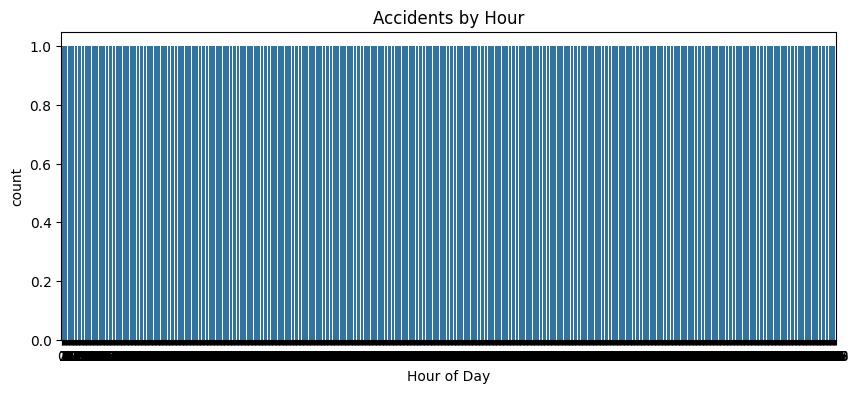

In [9]:
plt.figure(figsize=(10,4))
sns.countplot(df['Hour'])
plt.title('Accidents by Hour'); plt.xlabel('Hour of Day')


In [11]:
#  Accident Hotspots Map

In [12]:
m = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=6)
for _, row in df.sample(200).iterrows():
    folium.CircleMarker([row.Start_Lat, row.Start_Lng], radius=3, color='red', fill=True).add_to(m)
m.save('accident_hotspots.html')


In [13]:
# Accident Clustering (K-Means)

Text(0, 0.5, 'Latitude')

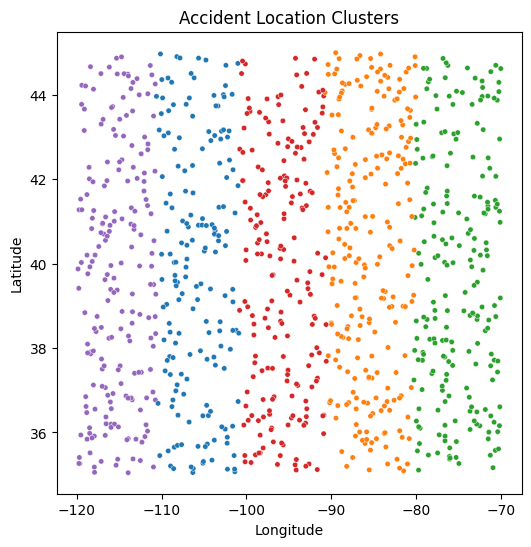

In [15]:
coords = df[['Start_Lat', 'Start_Lng']]
kmeans = KMeans(n_clusters=5, random_state=42).fit(coords)
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(6,6))
sns.scatterplot(x=coords['Start_Lng'], y=coords['Start_Lat'], hue=df['Cluster'], palette='tab10', legend=False, s=15)

plt.title('Accident Location Clusters'); plt.xlabel('Longitude'); plt.ylabel('Latitude')


In [16]:
# Insights & Summary Tables
# By Day of Week

Text(0.5, 1.0, 'Accidents by Day of Week')

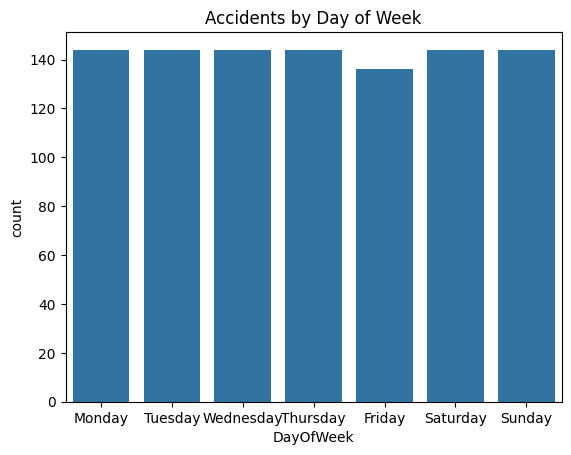

In [17]:
sns.countplot(data=df, x='DayOfWeek', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Accidents by Day of Week')


In [18]:
# Which Weather + Road Combinations See Most Accidents

In [19]:
combo = df.groupby(['Weather_Condition','Road_Condition']).size().reset_index(name='Count').sort_values('Count', ascending=False)
combo.head(10)


,Weather_Condition,Road_Condition,Count
22,Hail,Dry,30
33,Rain,Snowy,30
2,Clear,Icy,29
11,Cloudy,Potholes,28
17,Fog,Muddy,27
18,Fog,Potholes,26
25,Hail,Potholes,26
47,Storm,Snowy,25
9,Cloudy,Icy,24
37,Snow,Icy,24


In [21]:
#Conclusion
'''In this project, we analyzed traffic accident data to uncover meaningful patterns related to weather,
road conditions, and time of day. We found that accidents are more frequent during certain hours and weather conditions.
By applying clustering techniques like K-Means, we identified geographic accident hotspots, helping visualize high-risk zones.
 These insights can support better urban planning and road safety policies by highlighting key contributing factors.'''











'In this project, we analyzed traffic accident data to uncover meaningful patterns related to weather, \nroad conditions, and time of day. We found that accidents are more frequent during certain hours and weather conditions. \nBy applying clustering techniques like K-Means, we identified geographic accident hotspots, helping visualize high-risk zones.\n These insights can support better urban planning and road safety policies by highlighting key contributing factors.'